In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74124a009713df49014b300ff27df62


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | wanning
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | pinawa
Processing Record 7 of Set 1 | fairbanks
Processing Record 8 of Set 1 | nabire
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | neijiang
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | kisangani
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | kavaratti
Processing Record 22 of Set 1 | severnoye
Processing Record 2

Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | katangli
Processing Record 41 of Set 4 | marevo
Processing Record 42 of Set 4 | brae
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | monroe
Processing Record 45 of Set 4 | nuevitas
Processing Record 46 of Set 4 | newport
Processing Record 47 of Set 4 | salmas
Processing Record 48 of Set 4 | mackay
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | nikolskoye
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | svetlogorsk
Processing Record 3 of Set 5 | tuim
Processing Record 4 of Set 5 | crossville
Processing Record 5 of Set 5 | san quintin
Processing Record 6 of Set 5 | viransehir
Processing Record 7 of Set 5 | kidal
Processing Record 8 of Set 5 | ahipara
Processing Record 9 of Set 5 | marzuq
Processing Record 10 of Set 5 | port lincoln
Processing Record 11 of Set 5 | palmer
Processing Record 12 of Set 5 | lorengau
Processi

Processing Record 29 of Set 8 | college
Processing Record 30 of Set 8 | assela
City not found. Skipping...
Processing Record 31 of Set 8 | siva
Processing Record 32 of Set 8 | makakilo city
Processing Record 33 of Set 8 | nurota
Processing Record 34 of Set 8 | taiyuan
Processing Record 35 of Set 8 | san jose
Processing Record 36 of Set 8 | quatre cocos
Processing Record 37 of Set 8 | linjiang
Processing Record 38 of Set 8 | kloulklubed
Processing Record 39 of Set 8 | sao joao da barra
Processing Record 40 of Set 8 | dedza
Processing Record 41 of Set 8 | caboolture
Processing Record 42 of Set 8 | ostrovnoy
Processing Record 43 of Set 8 | naryan-mar
Processing Record 44 of Set 8 | mayumba
Processing Record 45 of Set 8 | vengerovo
Processing Record 46 of Set 8 | urumqi
Processing Record 47 of Set 8 | rincon
Processing Record 48 of Set 8 | witu
Processing Record 49 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 50 of Set 8 | kropotkin
Processing Record 1 of Set 9 | ru

Processing Record 14 of Set 12 | kaoma
Processing Record 15 of Set 12 | tabou
Processing Record 16 of Set 12 | saint-francois
Processing Record 17 of Set 12 | inuvik
Processing Record 18 of Set 12 | kansanshi
Processing Record 19 of Set 12 | longyearbyen
Processing Record 20 of Set 12 | shar
Processing Record 21 of Set 12 | mpraeso
Processing Record 22 of Set 12 | sompeta
Processing Record 23 of Set 12 | talikota
Processing Record 24 of Set 12 | mumford
Processing Record 25 of Set 12 | saldanha
Processing Record 26 of Set 12 | birao
Processing Record 27 of Set 12 | baryshivka
Processing Record 28 of Set 12 | mafra
Processing Record 29 of Set 12 | dorado
Processing Record 30 of Set 12 | balkhash
Processing Record 31 of Set 12 | bogorodskoye
Processing Record 32 of Set 12 | grand bank
Processing Record 33 of Set 12 | muisne
Processing Record 34 of Set 12 | sfantu gheorghe
Processing Record 35 of Set 12 | novobirilyussy
Processing Record 36 of Set 12 | meyungs
City not found. Skipping...


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'city_data' is not defined

In [16]:
# Reorder column City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guerrero Negro,MX,2022-02-02 01:27:45,27.9769,-114.0611,61.05,70,89,12.93
1,Busselton,AU,2022-02-02 01:23:51,-33.6500,115.3333,73.04,47,85,18.66
2,Rikitea,PF,2022-02-02 01:24:33,-23.1203,-134.9692,78.35,70,72,6.04
3,Wanning,CN,2022-02-02 01:27:45,18.8003,110.3967,68.81,91,93,6.35
4,Luderitz,NA,2022-02-02 01:25:03,-26.6481,15.1594,63.68,91,67,7.87
5,Pinawa,CA,2022-02-02 01:27:46,50.1489,-95.8811,-3.39,93,100,13.89
6,Fairbanks,US,2022-02-02 01:27:46,64.8378,-147.7164,-3.01,76,0,0.00
7,Nabire,ID,2022-02-02 01:27:46,-3.3667,135.4833,84.31,69,100,2.95
8,Kapaa,US,2022-02-02 01:26:02,22.0752,-159.3190,79.12,68,0,1.99
9,Hobart,AU,2022-02-02 01:27:47,-42.8794,147.3294,64.02,49,75,1.01


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

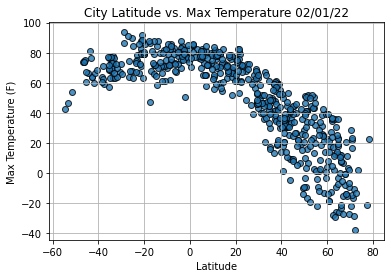

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

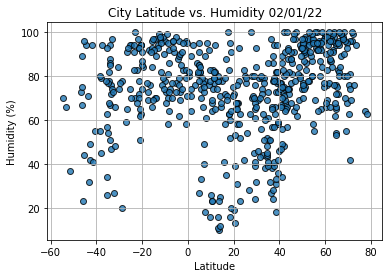

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

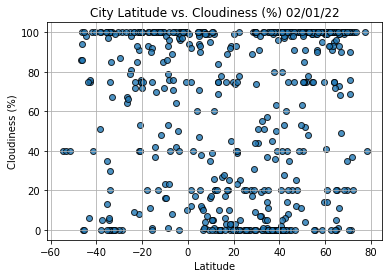

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

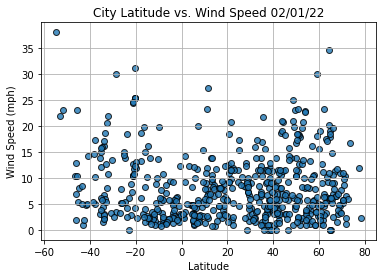

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
#cities.csv to df

cities_df = pd.read_csv("weather_data/cities.csv")

In [14]:
# Import linregress
from scipy.stats import linregress

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 = cities_df.loc[13]

index13

City_ID                        13
City                     Neijiang
Country                        CN
Date          2022-02-02 01:27:48
Lat                       29.5835
Lng                      105.0622
Max Temp                     43.0
Humidity                       84
Cloudiness                     99
Wind Speed                    1.7
Name: 13, dtype: object

In [19]:
# All Northern Hemisphere Latitudes

#cities_df.loc[(cities_df["Lat"] >= 0)].head()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = cities_df.loc[(cities_df["Lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["Lat"] < 0)]

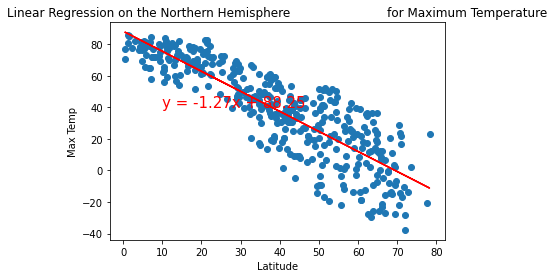

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

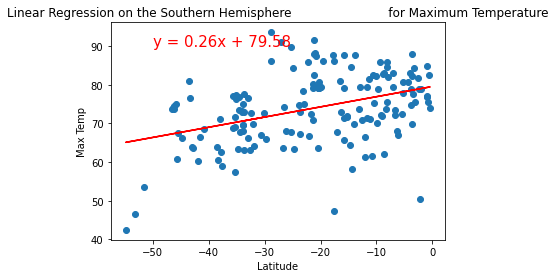

In [24]:
# Linear regression on the Souhern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

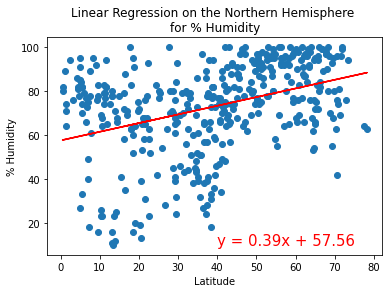

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

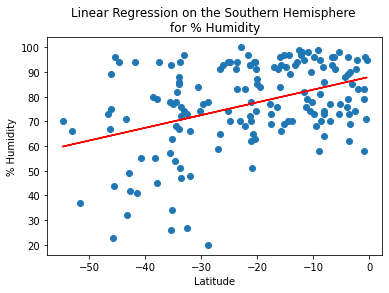

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

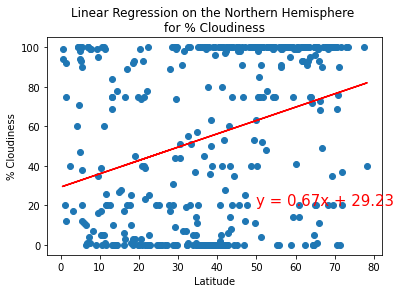

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,20))

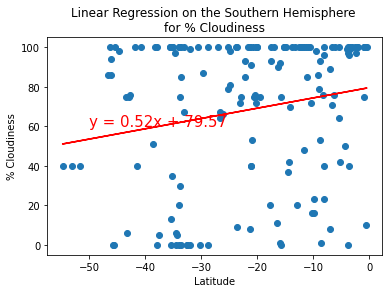

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

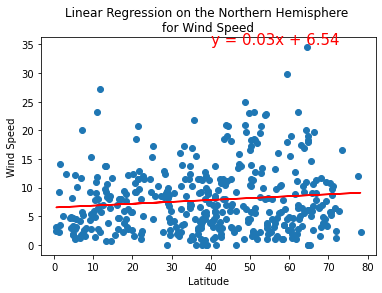

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

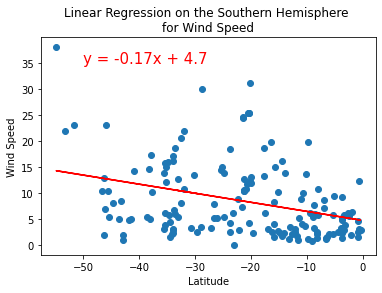

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))